# 1. Import Libraries

In [1]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import eda_helper_functions

from sklearn.ensemble import IsolationForest

# 2. Reading the Training Data

In [2]:
file_path = r"C:\Users\Amrit\Desktop\flight price prediction\data\train.csv"

train = pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-03-21,Banglore,New Delhi,08:55:00,19:10:00,615,1.0,In-flight meal not included,7832
1,Jet Airways,2019-03-27,Delhi,Cochin,17:30:00,04:25:00,655,1.0,In-flight meal not included,6540
2,Goair,2019-03-09,Banglore,New Delhi,11:40:00,14:35:00,175,0.0,No Info,7305
3,Air India,2019-06-12,Kolkata,Banglore,09:25:00,18:30:00,545,1.0,No Info,8366
4,Jet Airways,2019-03-12,Banglore,New Delhi,22:55:00,07:40:00,525,1.0,In-flight meal not included,11087
...,...,...,...,...,...,...,...,...,...,...
6690,Jet Airways,2019-03-21,Delhi,Cochin,10:45:00,18:50:00,1925,2.0,No Info,11093
6691,Air India,2019-05-01,Kolkata,Banglore,09:25:00,18:30:00,545,1.0,No Info,8891
6692,Jet Airways,2019-06-01,Delhi,Cochin,14:00:00,19:00:00,300,1.0,In-flight meal not included,10262
6693,Air Asia,2019-06-24,Delhi,Cochin,07:55:00,13:25:00,330,1.0,No Info,6152


In [70]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6695 entries, 0 to 6694
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          6695 non-null   object 
 1   date_of_journey  6695 non-null   object 
 2   source           6695 non-null   object 
 3   destination      6695 non-null   object 
 4   dep_time         6695 non-null   object 
 5   arrival_time     6695 non-null   object 
 6   duration         6695 non-null   int64  
 7   total_stops      6694 non-null   float64
 8   additional_info  6695 non-null   object 
 9   price            6695 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 523.2+ KB


## 2.1 Fixing Data Types

In [3]:
train = train.assign(**{
        col: pd.to_datetime(train.loc[:,col], dayfirst=True, format="mixed")
        for col in ["date_of_journey", "dep_time", "arrival_time"]
}
)
train.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

In [5]:
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-03-21,Banglore,New Delhi,08:55:00,19:10:00,615,1.0,In-flight meal not included,7832
1,Jet Airways,2019-03-27,Delhi,Cochin,17:30:00,04:25:00,655,1.0,In-flight meal not included,6540
2,Goair,2019-03-09,Banglore,New Delhi,11:40:00,14:35:00,175,0.0,No Info,7305
3,Air India,2019-06-12,Kolkata,Banglore,09:25:00,18:30:00,545,1.0,No Info,8366
4,Jet Airways,2019-03-12,Banglore,New Delhi,22:55:00,07:40:00,525,1.0,In-flight meal not included,11087
...,...,...,...,...,...,...,...,...,...,...
6690,Jet Airways,2019-03-21,Delhi,Cochin,10:45:00,18:50:00,1925,2.0,No Info,11093
6691,Air India,2019-05-01,Kolkata,Banglore,09:25:00,18:30:00,545,1.0,No Info,8891
6692,Jet Airways,2019-06-01,Delhi,Cochin,14:00:00,19:00:00,300,1.0,In-flight meal not included,10262
6693,Air Asia,2019-06-24,Delhi,Cochin,07:55:00,13:25:00,330,1.0,No Info,6152


# 3. Deep Summary of Data

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6695 entries, 0 to 6694
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          6695 non-null   object        
 1   date_of_journey  6695 non-null   datetime64[ns]
 2   source           6695 non-null   object        
 3   destination      6695 non-null   object        
 4   dep_time         6695 non-null   datetime64[ns]
 5   arrival_time     6695 non-null   datetime64[ns]
 6   duration         6695 non-null   int64         
 7   total_stops      6694 non-null   float64       
 8   additional_info  6695 non-null   object        
 9   price            6695 non-null   int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 523.2+ KB


In [73]:
train.isnull()

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
6690,False,False,False,False,False,False,False,False,False,False
6691,False,False,False,False,False,False,False,False,False,False
6692,False,False,False,False,False,False,False,False,False,False
6693,False,False,False,False,False,False,False,False,False,False


In [74]:
train.describe(include="number")

,duration,total_stops,price
count,6695.000000,6694.000000,6695.000000
mean,633.489171,0.801464,9030.965646
std,503.006311,0.659737,4639.522857
min,75.000000,0.000000,1759.000000
25%,170.000000,0.000000,5224.000000
50%,510.000000,1.000000,8283.000000
75%,922.500000,1.000000,12373.000000
max,2860.000000,3.000000,62427.000000


In [5]:
(
      train
      .assign(total_stops=train["total_stops"].astype(object))
      .describe(include="O")

)

,airline,source,destination,total_stops,additional_info
count,6695,6695,6695,6694.0,6695
unique,9,5,6,4.0,7
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,2391,2730,2730,3580.0,5249


# 4. Deep Analysis of Missing Values

In [6]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,
total_stops,1,0.014937


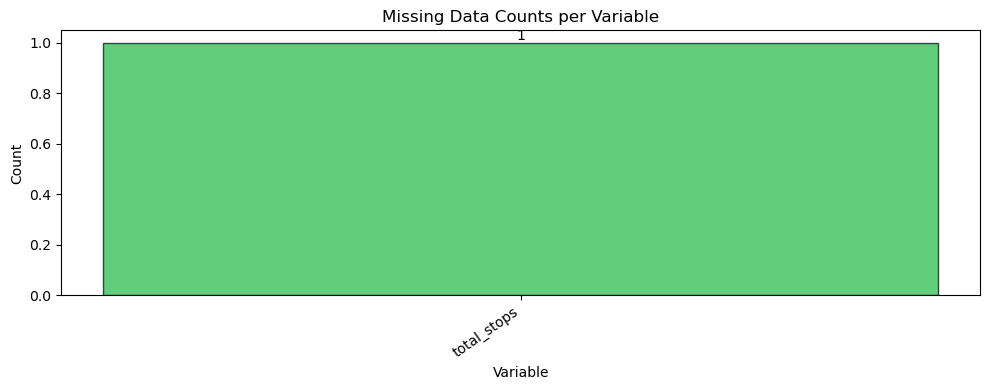

In [77]:
eda_helper_functions.plot_missing_info(train)

# Deep analysis of Outliers

In [7]:
forest = IsolationForest(n_estimators=10, random_state=42)

In [8]:
train[pd.isnull(train["total_stops"])]

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
2534,Air India,2019-05-06,Delhi,Cochin,2024-05-22 09:45:00,2024-05-22 09:25:00,1420,NaN,No Info,7480


In [9]:
train = train.drop(index=2534)

In [10]:
(
        train
        .assign(outlier=forest.fit_predict(
                train
                .drop(columns="price")
                .select_dtypes(include="number")
                 ))
        .query("outlier == -1")

)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
5,Jet Airways,2019-04-21,Banglore,Delhi,2024-05-22 18:55:00,2024-05-22 22:00:00,185,0.0,In-flight meal not included,4544,-1
7,Spicejet,2019-06-15,Mumbai,Hyderabad,2024-05-22 05:45:00,2024-05-22 07:15:00,90,0.0,No check-in baggage included,2647,-1
9,Jet Airways,2019-05-09,Delhi,Cochin,2024-05-22 23:05:00,2024-05-22 04:25:00,1760,2.0,No Info,15129,-1
10,Jet Airways,2019-06-12,Kolkata,Banglore,2024-05-22 14:05:00,2024-05-22 10:05:00,1200,1.0,No Info,13044,-1
12,Jet Airways,2019-06-24,Delhi,Cochin,2024-05-22 21:25:00,2024-05-22 19:00:00,1295,2.0,No Info,13292,-1
...,...,...,...,...,...,...,...,...,...,...,...
6687,Air India,2019-06-06,Kolkata,Banglore,2024-05-22 05:50:00,2024-05-22 08:55:00,1625,2.0,No Info,12723,-1
6688,Jet Airways,2019-06-15,Delhi,Cochin,2024-05-22 21:25:00,2024-05-22 12:35:00,910,2.0,In-flight meal not included,9905,-1
6689,Indigo,2019-03-03,Mumbai,Hyderabad,2024-05-22 09:10:00,2024-05-22 10:40:00,90,0.0,No Info,5755,-1
6690,Jet Airways,2019-03-21,Delhi,Cochin,2024-05-22 10:45:00,2024-05-22 18:50:00,1925,2.0,No Info,11093,-1


# 6.Pair Plots

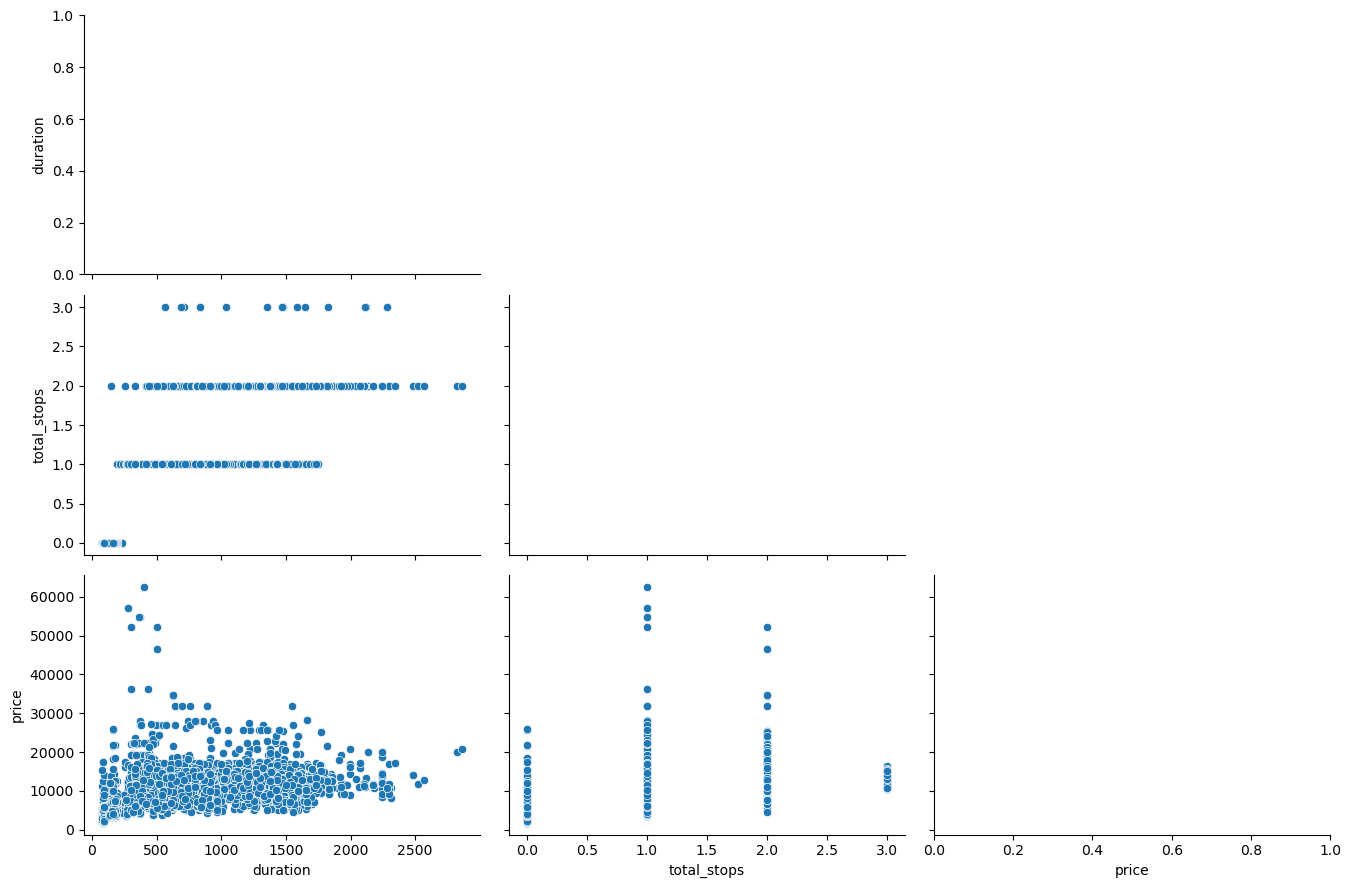

In [11]:
eda_helper_functions.pair_plots(train)

# 7. Correlation Analysis

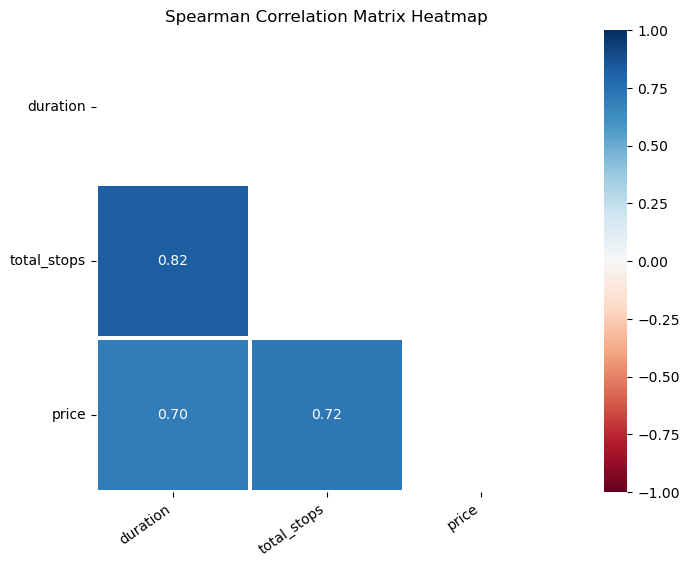

In [83]:
eda_helper_functions.correlation_heatmap(train)

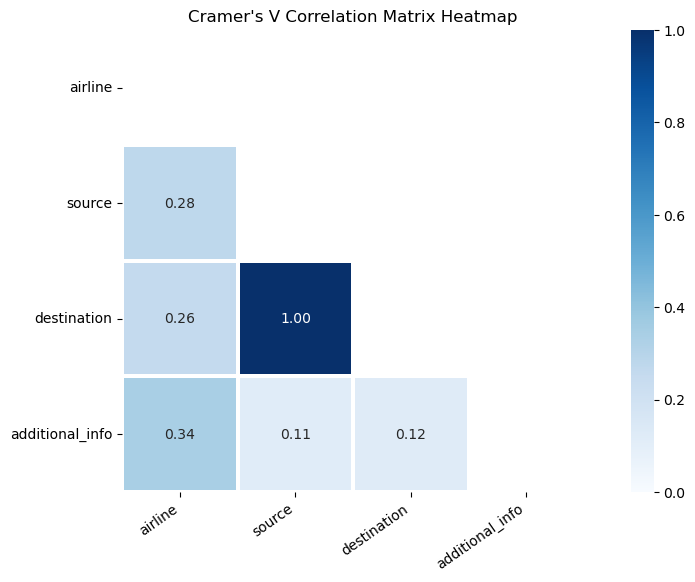

In [84]:
eda_helper_functions.cramersV_heatmap(train)

# 8. Detailed Analysis

In [85]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

## 8.1 Airline

In [86]:
train.airline

0       Jet Airways
1       Jet Airways
2             Goair
3         Air India
4       Jet Airways
           ...     
6690    Jet Airways
6691      Air India
6692    Jet Airways
6693       Air Asia
6694      Air India
Name: airline, Length: 6694, dtype: object

In [87]:
eda_helper_functions.cat_summary(train,"airline")

0       Jet Airways
1       Jet Airways
2             Goair
3         Air India
4       Jet Airways
           ...     
6690    Jet Airways
6691      Air India
6692    Jet Airways
6693       Air Asia
6694      Air India
Name: airline, Length: 6694, dtype: object

Data Type      : object
Cardinality    : 9 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,694 / 6,694 rows


,
count,6694
unique,9
top,Jet Airways
freq,2391


,count,percentage
category,,
Jet Airways,2391,0.357186
Indigo,1296,0.193606
Air India,1075,0.160592
Multiple Carriers,736,0.109949
Spicejet,537,0.080221
Vistara,322,0.048103
Air Asia,211,0.031521
Goair,125,0.018673
Trujet,1,0.000149


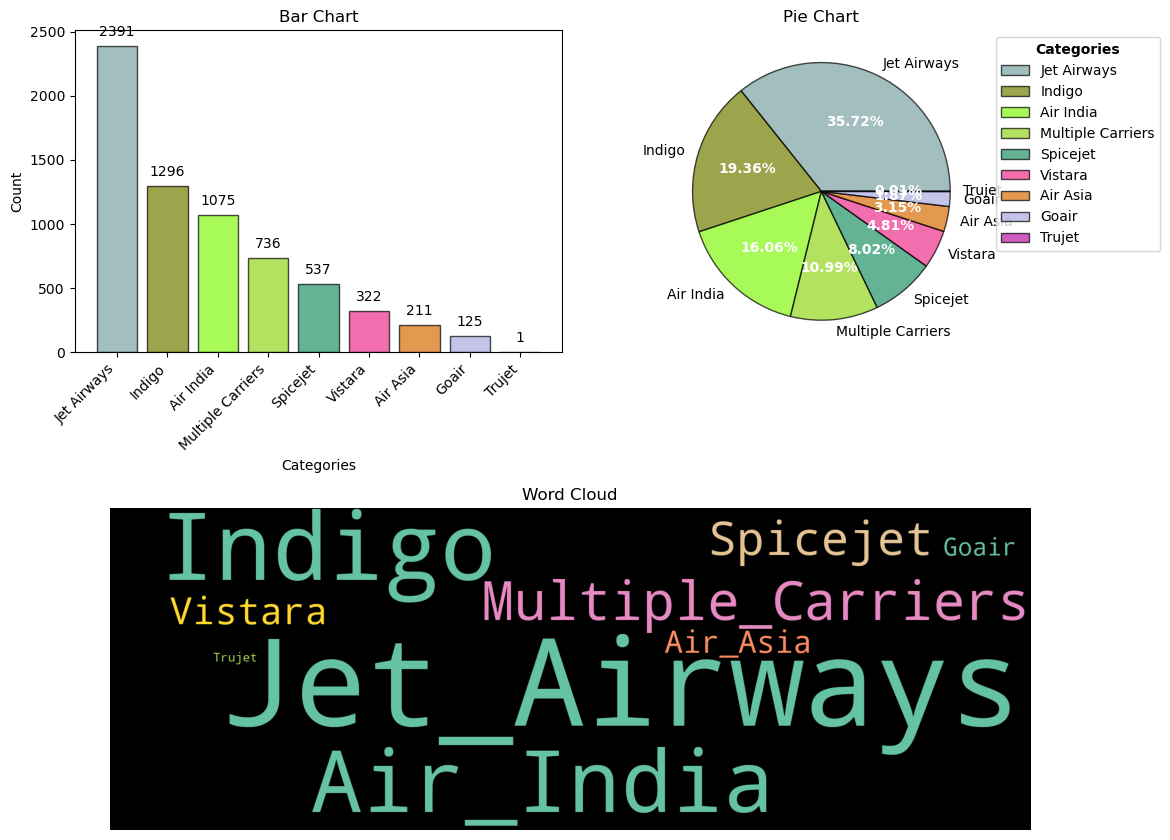

In [88]:
eda_helper_functions.cat_univar_plots(train,"airline")

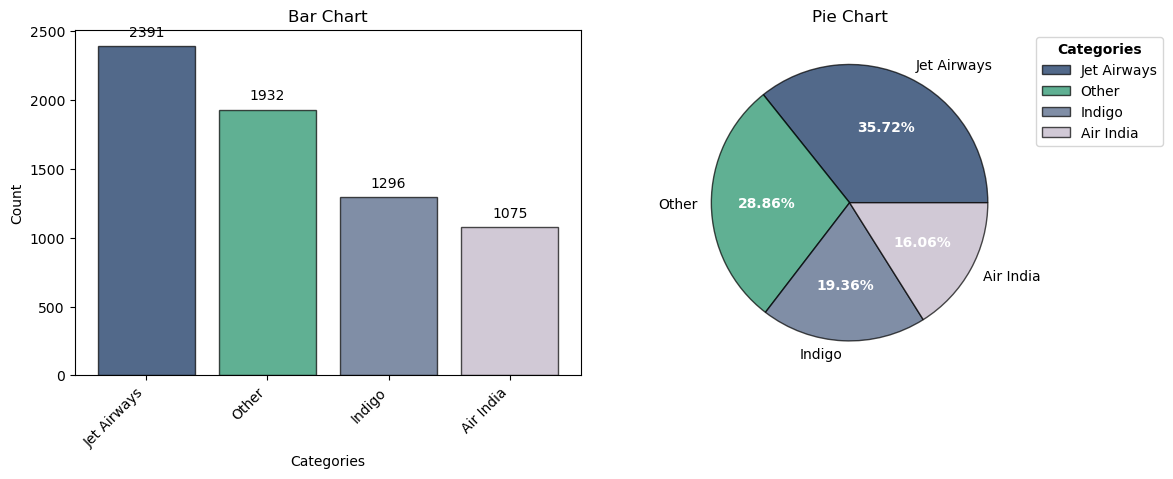

In [89]:
eda_helper_functions.cat_univar_plots(train,"airline",show_wordcloud=False, k=3)

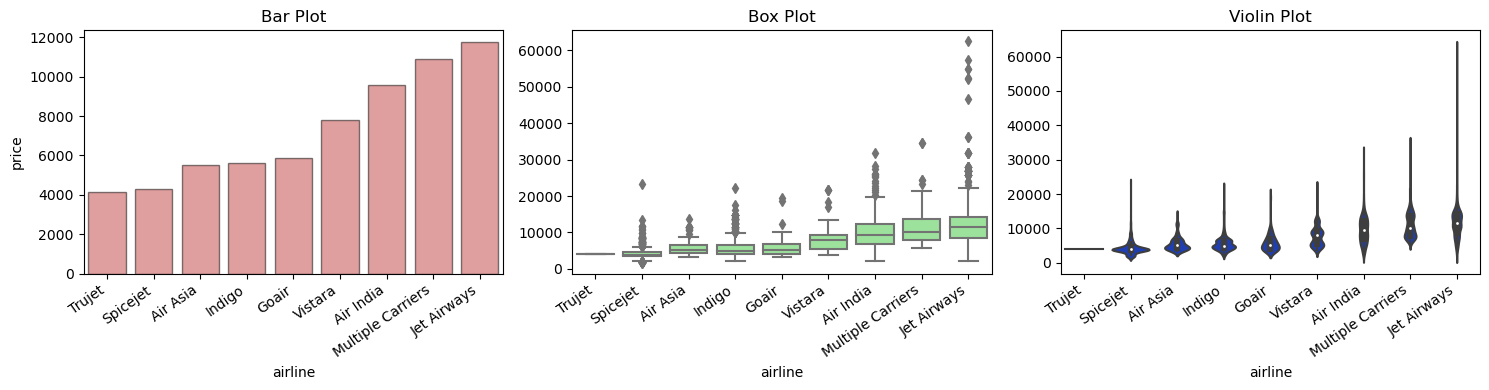

In [12]:
eda_helper_functions.num_cat_bivar_plots(
    data=train,
    num_var="price",
    cat_var="airline"
)

In [90]:
eda_helper_functions.num_cat_hyp_testing(train, "price", "airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 473.2504388077414
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 3130.947388921903
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


### 1.The F-statistic of 447.17 is very large, suggesting that the variance between the groups is much greater than the variance within the groups.

### 2.A p-value of zero (or effectively zero) indicates that the probability of observing such an extreme F-statistic under the null hypothesis (no difference between group means) is virtually zero. This means we reject the null hypothesis and conclude that there are significant differences between the groups.

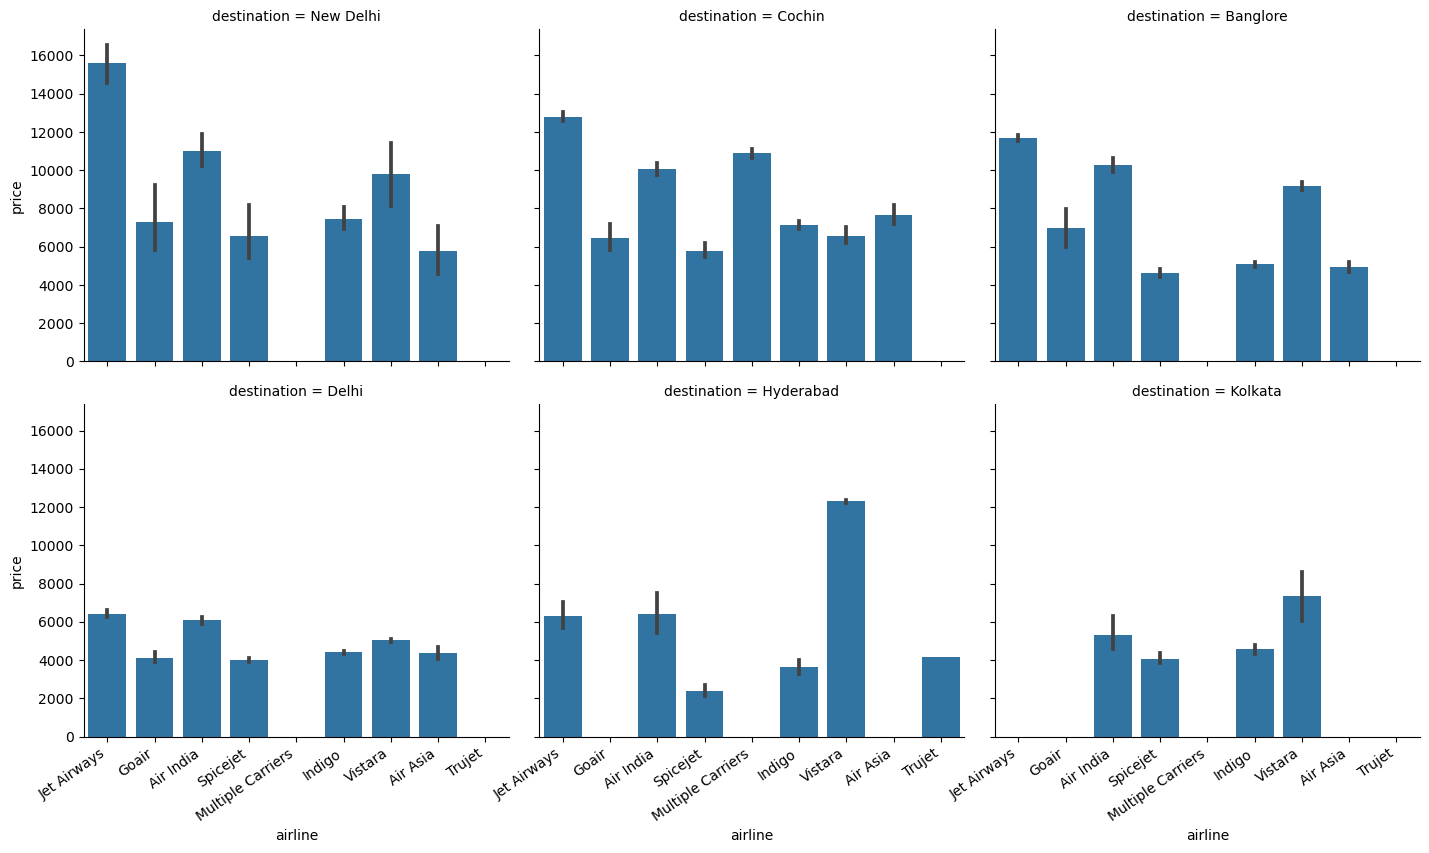

In [91]:
airline_grid = sns.FacetGrid(
    data=train,
    col="destination",
    col_wrap=3,
    height=4,
    aspect=1.2,
    sharey=True
)

airline_grid.map(sns.barplot, "airline", "price", order=train.airline.unique())

for ax in airline_grid.axes[3:]:
    eda_helper_functions.rotate_xlabels(ax)

## 8.2 date_of_journey

In [10]:
train.date_of_journey

0      2019-03-21
1      2019-03-27
2      2019-03-09
3      2019-06-12
4      2019-03-12
          ...    
6690   2019-03-21
6691   2019-05-01
6692   2019-06-01
6693   2019-06-24
6694   2019-03-01
Name: date_of_journey, Length: 6694, dtype: datetime64[ns]

C:\Users\Amrit\Desktop\flight price prediction\script\eda_helper_functions.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
C:\Users\Amrit\Desktop\flight price prediction\script\eda_helper_functions.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(


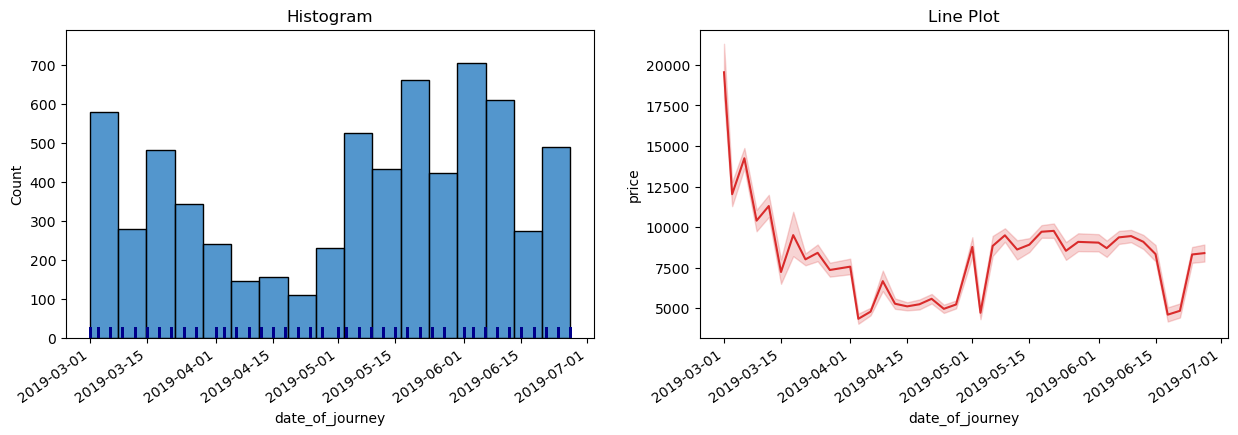

In [11]:
eda_helper_functions.dt_univar_plots(
    data=train,
    var="date_of_journey",
    target="price"
)

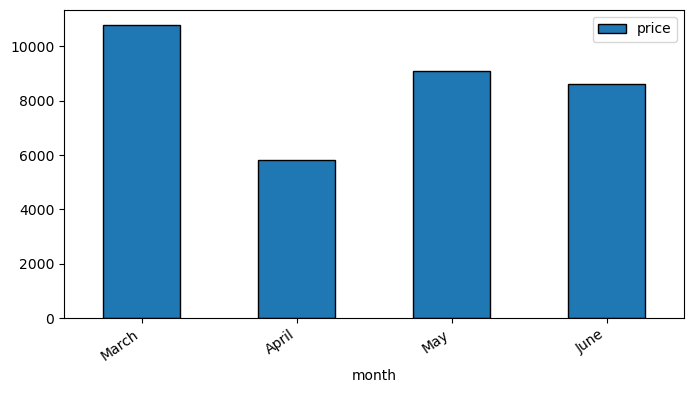

In [17]:
(
    train
    .groupby(pd.Grouper(key="date_of_journey", freq="M"))
    .price.mean()
    .to_frame()
    .set_axis(["March", "April", "May", "June"], axis=0)
    .rename_axis(index="month")
    .plot(
       kind="bar",
       figsize=(8, 4),
       edgecolor="black"
    )
)

ax = plt.gca()

eda_helper_functions.rotate_xlabels(ax)

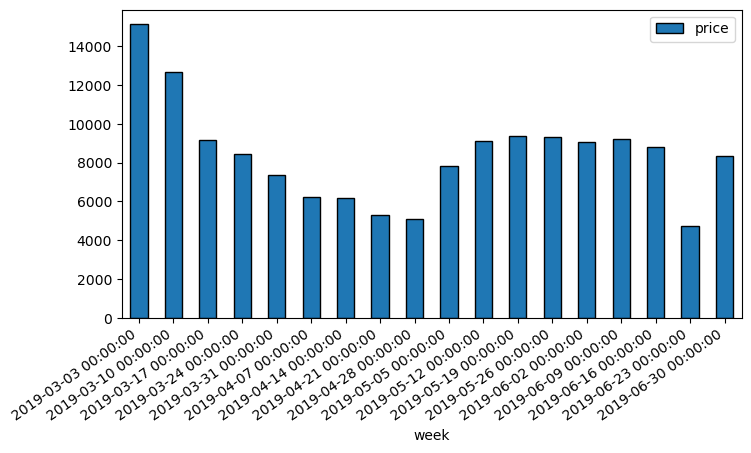

In [18]:
(
    train
    .groupby(pd.Grouper(key="date_of_journey", freq="W"))
    .price.mean()
    .to_frame()
    .rename_axis(index="week")
    .plot(
       kind="bar",
       figsize=(8, 4),
       edgecolor="black"
    )
)

ax = plt.gca()

eda_helper_functions.rotate_xlabels(ax)

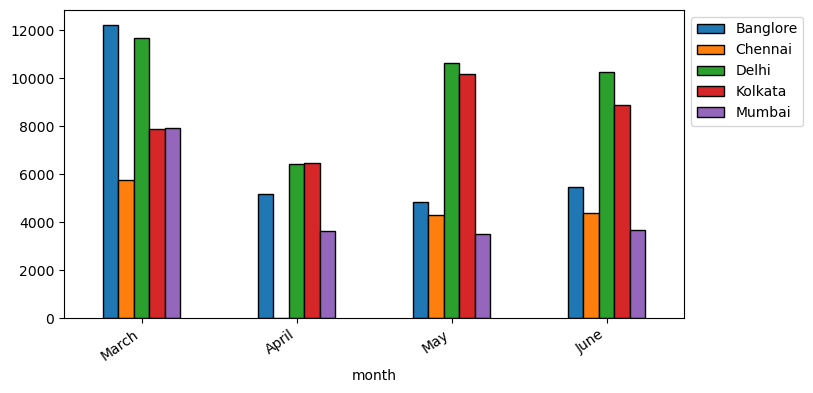

In [21]:
(
    train
    .groupby([pd.Grouper(key="date_of_journey", freq="M"),"source"])
    .price.mean()
    .unstack(fill_value=0)
    .set_axis(["March", "April", "May", "June"], axis=0)
    .rename_axis(index="month")
    .plot(
       kind="bar",
       figsize=(8, 4),
       edgecolor="black"
    )
)

ax = plt.gca()

ax.legend(
        loc="upper left",
        bbox_to_anchor=(1,1)
)

eda_helper_functions.rotate_xlabels(ax)

## dep_time

In [22]:
train.dep_time

0      2024-05-21 08:55:00
1      2024-05-21 17:30:00
2      2024-05-21 11:40:00
3      2024-05-21 09:25:00
4      2024-05-21 22:55:00
               ...        
6690   2024-05-21 10:45:00
6691   2024-05-21 09:25:00
6692   2024-05-21 14:00:00
6693   2024-05-21 07:55:00
6694   2024-05-21 11:50:00
Name: dep_time, Length: 6694, dtype: datetime64[ns]

C:\Users\Amrit\Desktop\flight price prediction\script\eda_helper_functions.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
C:\Users\Amrit\Desktop\flight price prediction\script\eda_helper_functions.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(


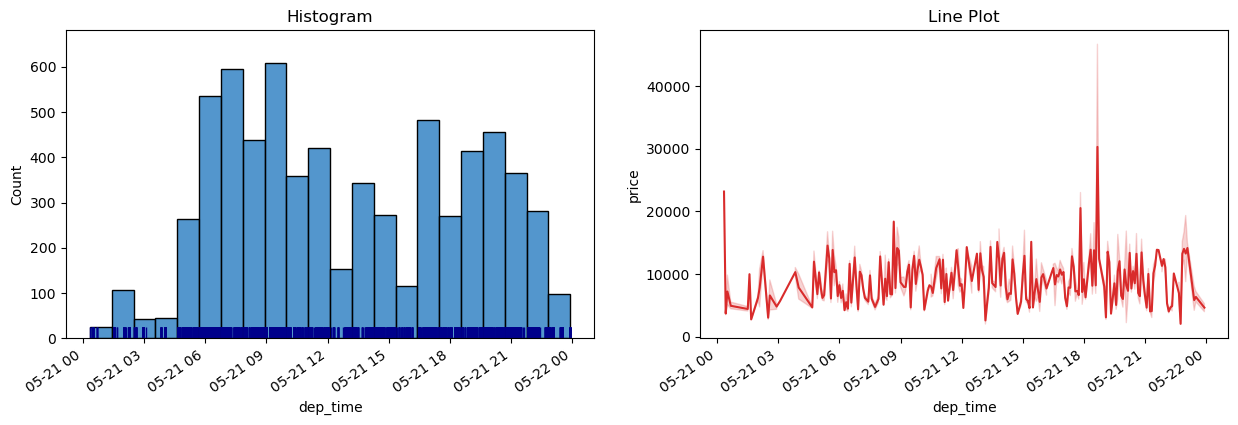

In [23]:
eda_helper_functions.dt_univar_plots(train, "dep_time", "price")

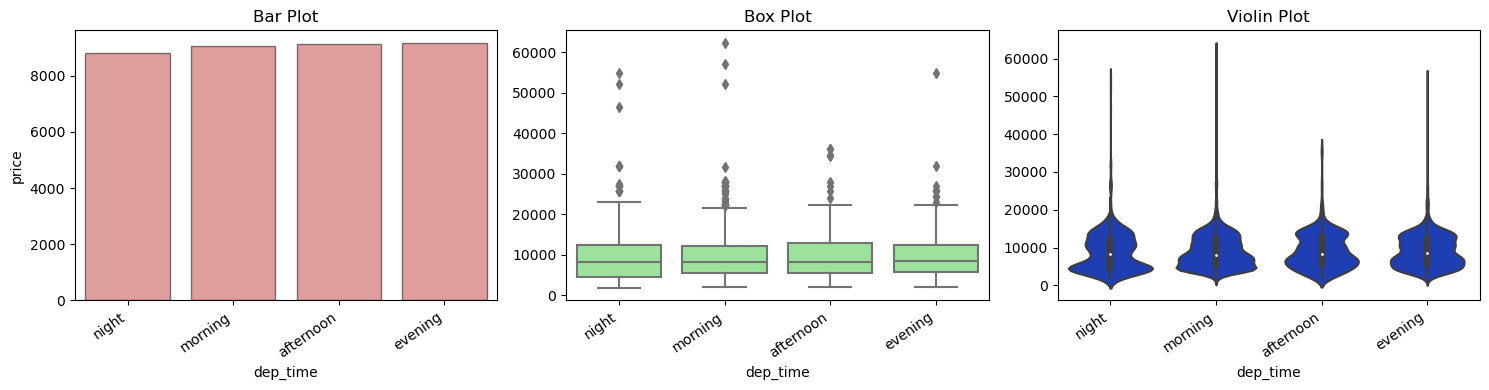

In [24]:
(
    train
    .assign(dep_time=lambda df_: (
        np.select([df_.dep_time.dt.hour.between(4, 12, inclusive="left"),
                   df_.dep_time.dt.hour.between(12, 16, inclusive="left"),
                   df_.dep_time.dt.hour.between(16, 20, inclusive="left")],
                  ["morning", "afternoon", "evening"],
                  default="night")
    ))
    .pipe(eda_helper_functions.num_cat_bivar_plots, "price", "dep_time")
)

## 8.4 duration

In [25]:
train.duration

0        615
1        655
2        175
3        545
4        525
        ... 
6690    1925
6691     545
6692     300
6693     330
6694    1265
Name: duration, Length: 6694, dtype: int64

In [26]:
eda_helper_functions.num_summary(train, "duration")

0        615
1        655
2        175
3        545
4        525
        ... 
6690    1925
6691     545
6692     300
6693     330
6694    1265
Name: duration, Length: 6694, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 6,694 / 6,694 rows


,value
percentile,
0,75.00
5,90.00
10,145.00
25,170.00
50,510.00
75,920.00
90,1440.00
95,1601.75
99,1855.00


,value
mean,633.371676
trimmed mean (5%),599.575174
trimmed mean (10%),570.895258
median,510.000000


,value
var,252960.712875
std,502.951999
IQR,750.000000
mad,340.000000
coef_variance,0.794087


,value
skewness,0.894131
kurtosis,-0.052204


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 0.0
Test Statistic       : 0.8865419626235962
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 248.45769626661695
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


In [27]:
train.duration.quantile([0.25, 0.5, 0.75])

0.25    170.0
0.50    510.0
0.75    920.0
Name: duration, dtype: float64

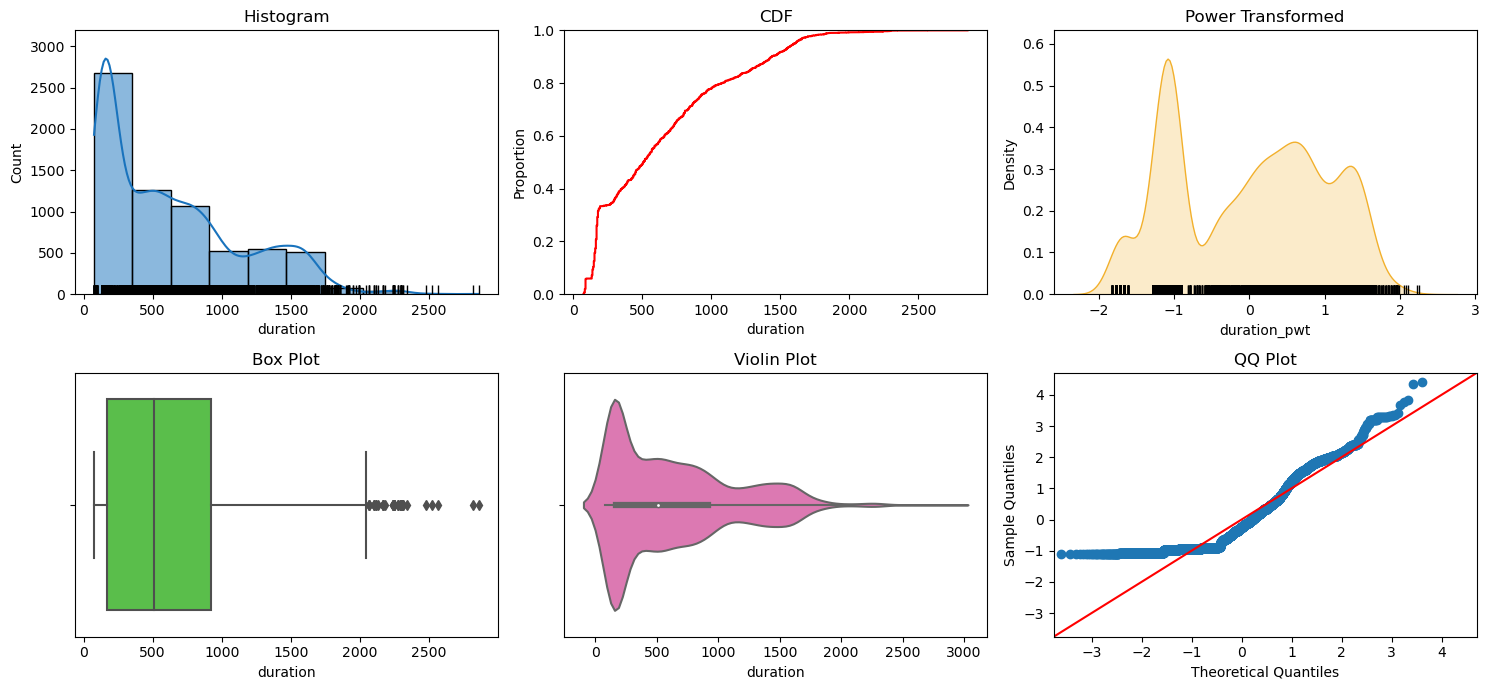

In [28]:
eda_helper_functions.num_univar_plots(train, "duration")

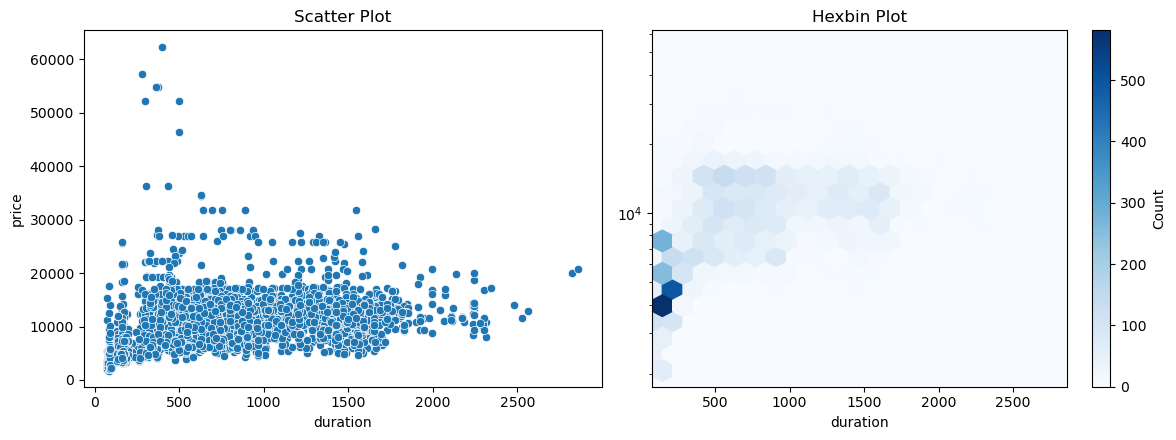

In [29]:
eda_helper_functions.num_bivar_plots(
    train,
    "duration",
    "price",
    hexbin_kwargs=dict(
        yscale="log",
        gridsize=20,
        cmap="Blues"
    )
)

In [30]:
eda_helper_functions.num_num_hyp_testing(train, "price", "duration")

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.5091878071906605
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.6980000420004595
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


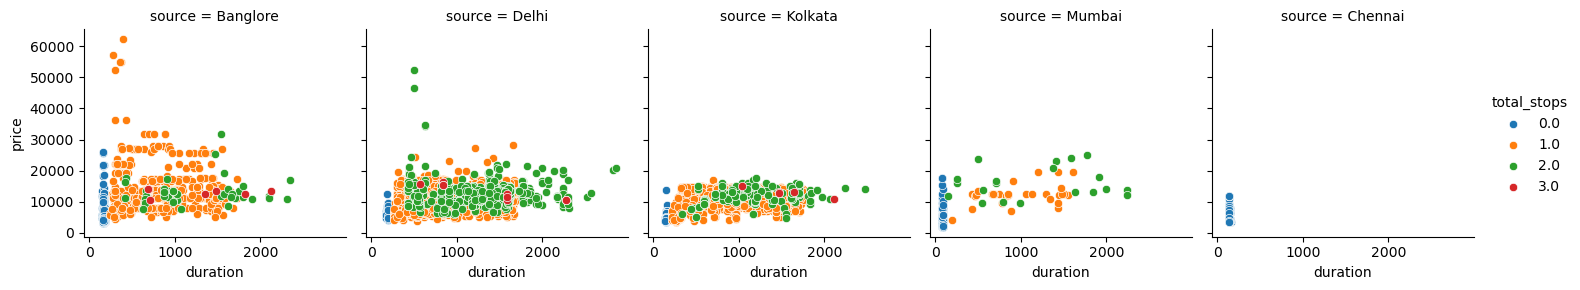

In [13]:
duration_grid = sns.FacetGrid(
    data=train,
    col="source",
    hue="total_stops",
    sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

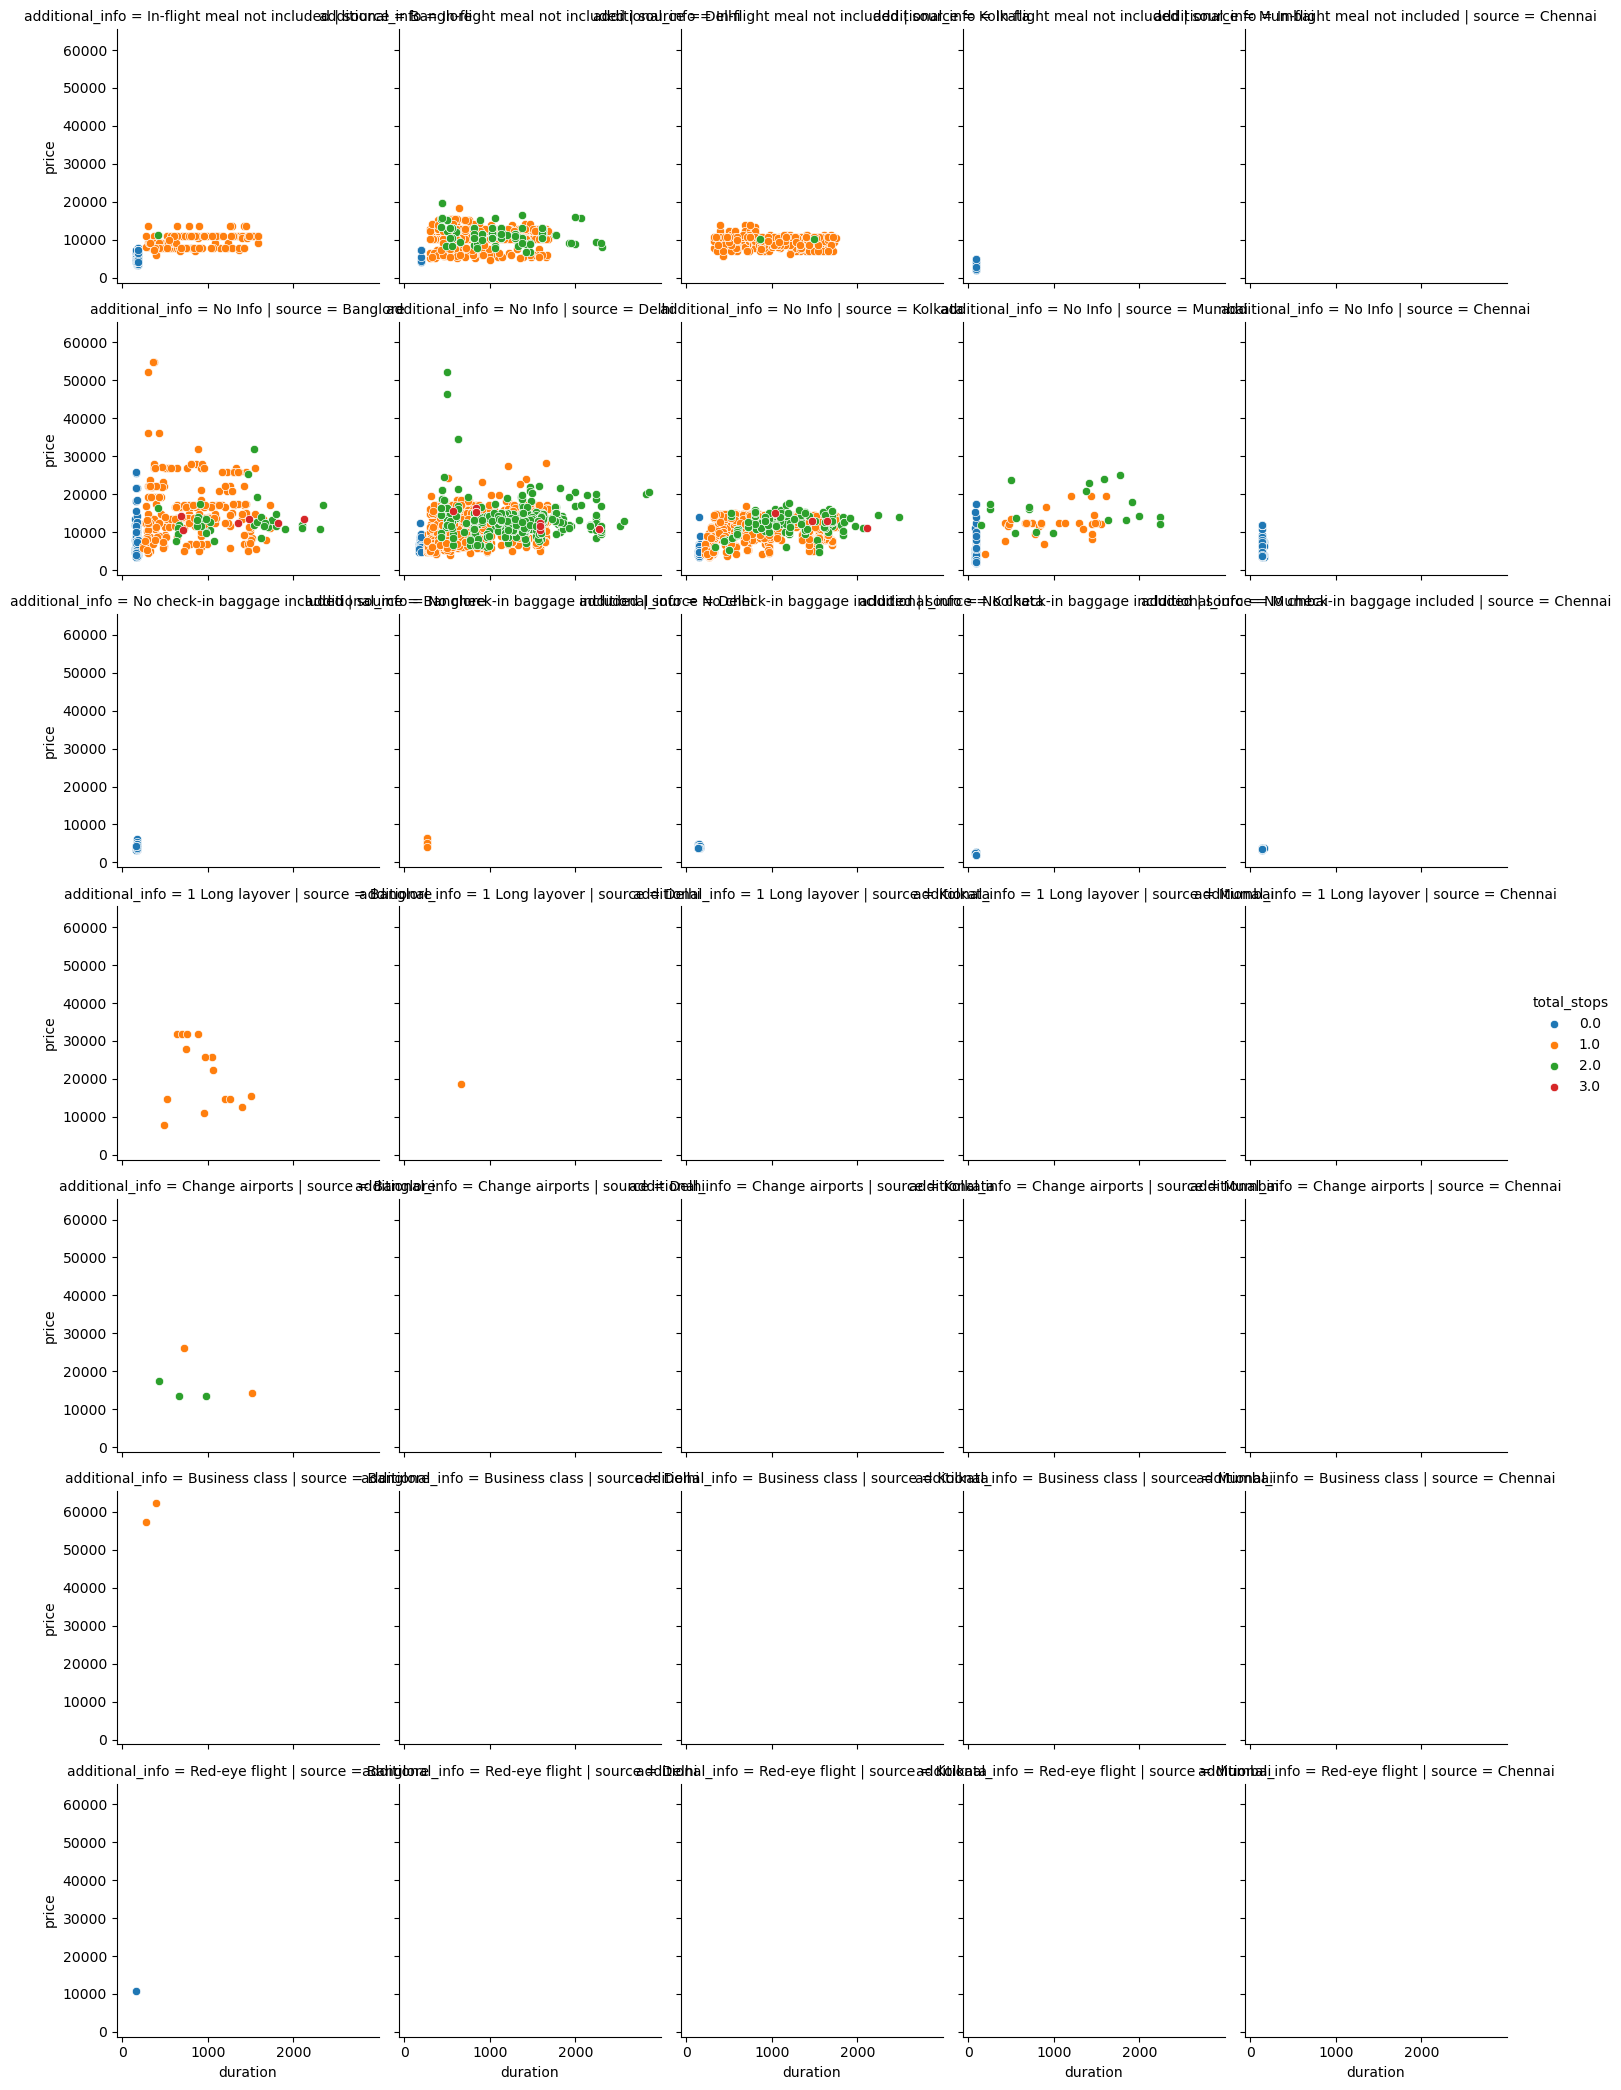

In [14]:
duration_grid = sns.FacetGrid(
    data=train,
    col="source",
    row="additional_info",
    hue="total_stops",
    sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

In [15]:
eda_helper_functions.get_iqr_outliers(train, "duration")

Lower Limit : -955.0
Upper Limit : 2045.0


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
3690,Air India,2019-05-01,Kolkata,Banglore,2024-05-22 05:50:00,2024-05-22 16:15:00,2065,2.0,No Info,10991
6079,Jet Airways,2019-03-06,Delhi,Cochin,2024-05-22 17:55:00,2024-05-22 04:25:00,2070,2.0,No Info,17072
3225,Jet Airways,2019-03-06,Delhi,Cochin,2024-05-22 17:55:00,2024-05-22 04:25:00,2070,2.0,In-flight meal not included,15812
2990,Air India,2019-03-03,Banglore,New Delhi,2024-05-22 11:05:00,2024-05-22 22:10:00,2105,2.0,No Info,11791
4589,Air India,2019-03-18,Banglore,New Delhi,2024-05-22 11:05:00,2024-05-22 22:10:00,2105,2.0,No Info,11161
1517,Air India,2019-03-03,Banglore,New Delhi,2024-05-22 11:05:00,2024-05-22 22:10:00,2105,2.0,No Info,11948
2916,Air India,2019-05-12,Kolkata,Banglore,2024-05-22 12:00:00,2024-05-22 23:15:00,2115,3.0,No Info,10991
2170,Air India,2019-03-12,Banglore,New Delhi,2024-05-22 06:45:00,2024-05-22 18:05:00,2120,3.0,No Info,13387
1105,Jet Airways,2019-03-06,Delhi,Cochin,2024-05-22 16:50:00,2024-05-22 04:25:00,2135,2.0,No Info,19907
4000,Air India,2019-03-06,Delhi,Cochin,2024-05-22 07:05:00,2024-05-22 19:15:00,2170,2.0,No Info,11552


## 8.5 additional_info

In [16]:
eda_helper_functions.cat_summary(train, "additional_info")

0       In-flight meal not included
1       In-flight meal not included
2                           No Info
3                           No Info
4       In-flight meal not included
                   ...             
6690                        No Info
6691                        No Info
6692    In-flight meal not included
6693                        No Info
6694                 1 Long layover
Name: additional_info, Length: 6694, dtype: object

Data Type      : object
Cardinality    : 7 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,694 / 6,694 rows


,
count,6694
unique,7
top,No Info
freq,5248


,count,percentage
category,,
No Info,5248,0.783986
In-flight meal not included,1215,0.181506
No check-in baggage included,207,0.030923
1 Long layover,16,0.002390
Change airports,5,0.000747
Business class,2,0.000299
Red-eye flight,1,0.000149


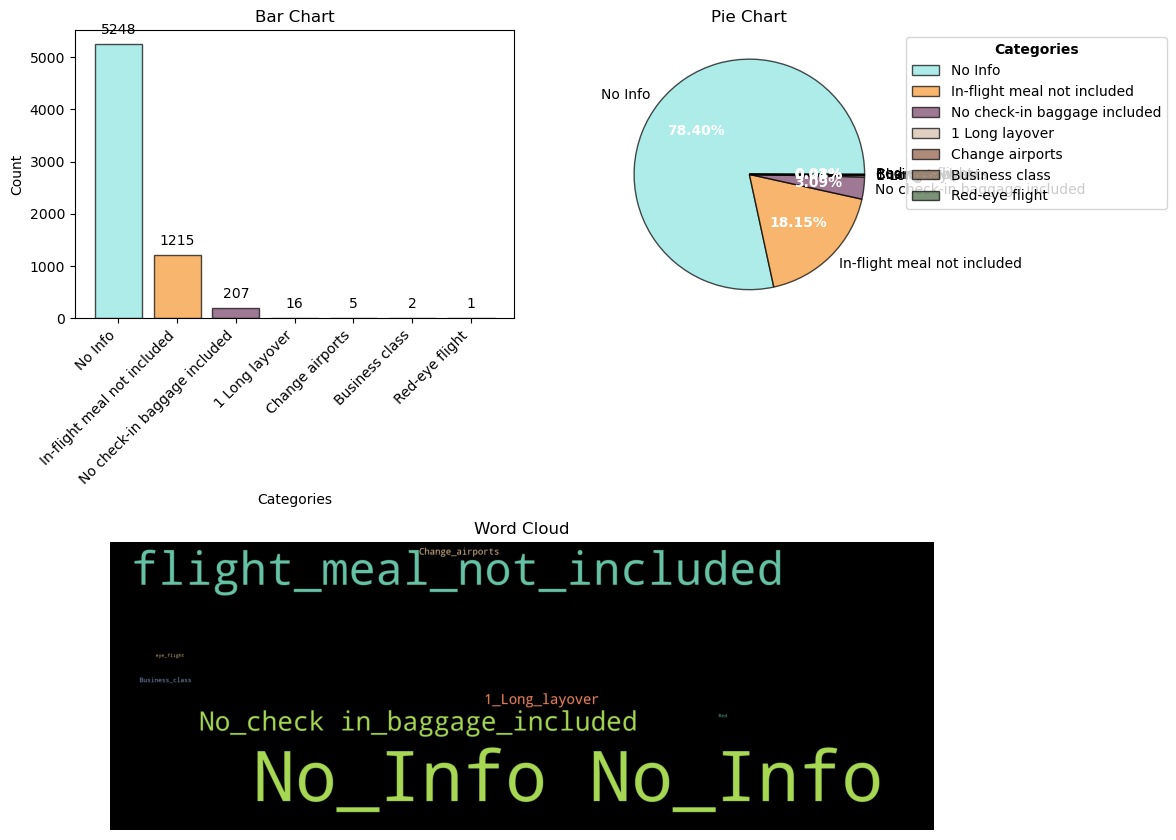

In [18]:
eda_helper_functions.cat_univar_plots(train, "additional_info")

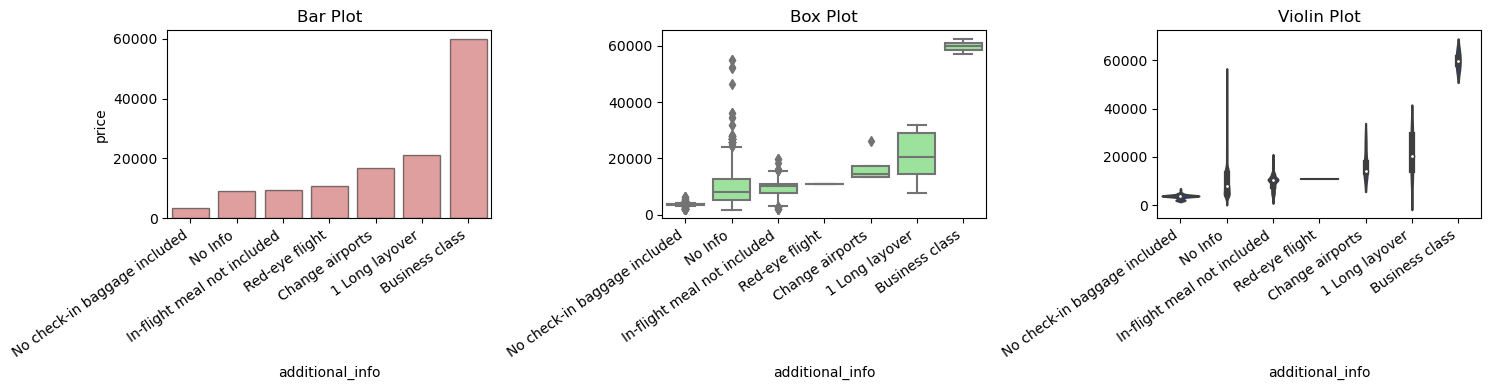

In [19]:
eda_helper_functions.num_cat_bivar_plots(train, "price", "additional_info")

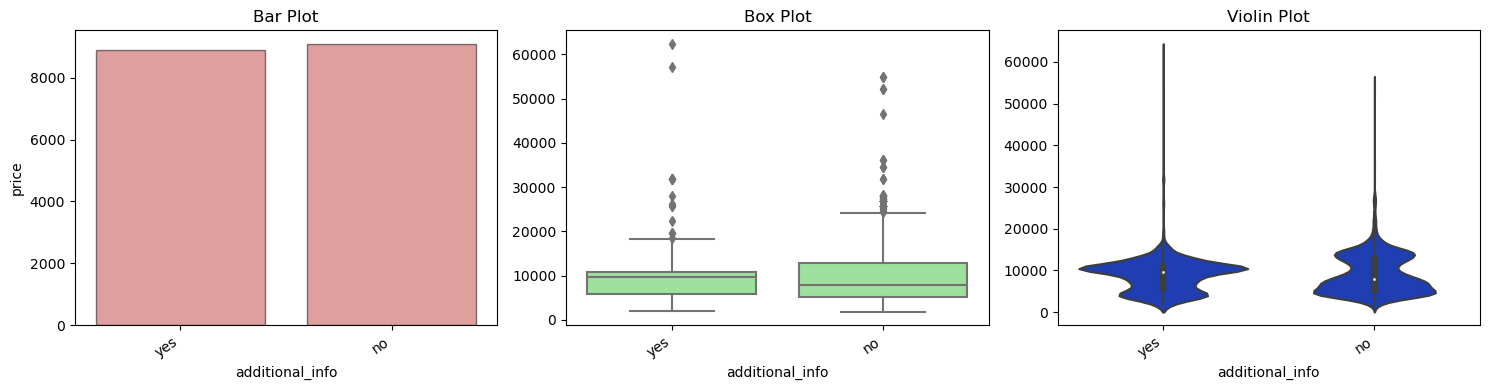

In [20]:
# convertion additional_info into a binary feature for analysis

(
    train
    .assign(additional_info=(
        train
        .additional_info
        .pipe(lambda ser: np.where(ser.eq("No Info"), "no", "yes"))
    ))
    .pipe(eda_helper_functions.num_cat_bivar_plots, "price", "additional_info")
)

- adiitional_info has severly rare catergories
- Converted it into a  binary feature for further analysis

## 9. Automated EDA

In [23]:
pip install ydata-profiling

  Obtaining dependency information for ydata-profiling from https://files.pythonhosted.org/packages/33/85/45027914eb485482976883dcaab434eab99f1ed5cb222781e7ba46bdf3b7/ydata_profiling-4.8.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for pydantic>=2 from https://files.pythonhosted.org/packages/ed/76/9a17032880ed27f2dbd490c77a3431cbc80f47ba81534131de3c2846e736/pydantic-2.7.1-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/107.3 kB ? eta -:--:--
     -------------- ---------------------- 41.0/107.3 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 107.3/107.3 kB 1.5 MB/s eta 0:00:00
  Obtaining dependency information for visions[type_image_path]<0.7.7,>=0.7.5 from https://files.pythonhosted.org/packages/7c/bf/612b24e711ae25dea9af19b9304634b8949faa0b035fad47e8bcadf62f59/visions-0.7.6-py3-none-any.whl.metadata
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-cloud-auth 0.1.3 requires pydantic<2.0, but you have pydantic 2.7.1 which is incompatible.


In [24]:
from ydata_profiling import ProfileReport

In [25]:
report = ProfileReport(train)

In [26]:
report.to_file(output_file="output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]